# Численная интерполяция

## Вариант 20

> <span style="font-style:normal; font-size:12pt;"> 
    <p> Построить численную интерполяцию функции y = f(x) на открезке [a, b] в точках x*, не совпадающих с узлами интерполяции, используя интерполяционный полином Лагранжа. В качестве x* выбрать середины отрезков между интерполяционными узлами. В качестве узлов интерполяции по пространственной переменной использовать: </p>
    <p> <pre> а) - равномерный шаг h между узлами </pre> </p>
    <p> <pre> б) - узлы Чебышева                  </pre> </p> </span>

\begin{equation}
f(x) = ln(2 + x*(1 + cos(x))), \quad {x \in [0,10]}
\end{equation}

In [1]:
import math
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [2]:
# исходная функция
def f(x):
    return np.log(2 + x * (1 + np.cos(x)))

In [3]:
# интервал [0, 10]
a = 0
b = 10

In [4]:
# исходная функция (точки для построения гладкого графика)
x_plot = np.linspace(a, b, 1000)
y_plot = [f(x) for x in x_plot]

### а) Равномерный шаг h между узлами

In [9]:
# интерполянта
def F1(x, x_plot, y_plot):
    sum = 0
    
    for i in range(len(x_plot)):
        mult = 1
        
        for j in range(len(x_plot)):
            if i != j:
                mult *= (x - x_plot[j]) / (x_plot[i] - x_plot[j])
                
        sum += y_plot[i] * mult
    
    return sum

In [5]:
# шаг узлов интерполяции
h = float(input("Input step h: "))

Input step h: 0.5


In [6]:
# узлы интерполяции
x1_plot = np.linspace(a, b, int(np.trunc((b - a) / h)))
y1_plot = [f(x) for x in x1_plot]

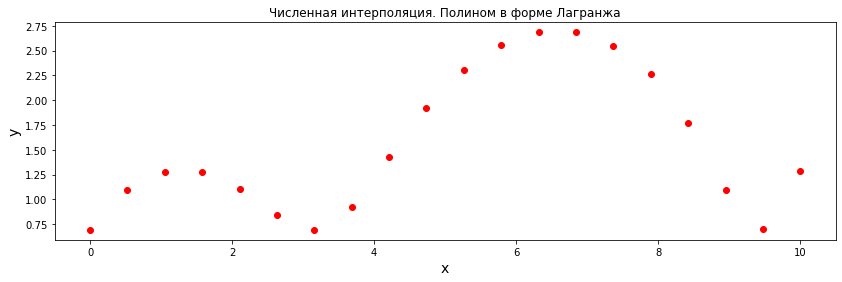

In [7]:
# задание графика
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title("Численная интерполяция. Полином в форме Лагранжа")
ax.scatter(x1_plot, y1_plot, c='r')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

plt.show()

In [10]:
# интерполянта (точки для построения гладкого графика)
X0_plot = np.linspace(a, b, 1000)
Y0_plot = [F1(x, x1_plot, y1_plot) for x in X0_plot]

In [11]:
# задание исследуемых точек
X1_plot = []

for i in range(0, len(x1_plot) - 1):
    X1_plot.append(x1_plot[i])
    x_ = (x1_plot[i] + x1_plot[i + 1]) / 2
    X1_plot.append(x_)

X1_plot.append(b)

Y1_plot = [F1(x, x1_plot, y1_plot) for x in X1_plot]

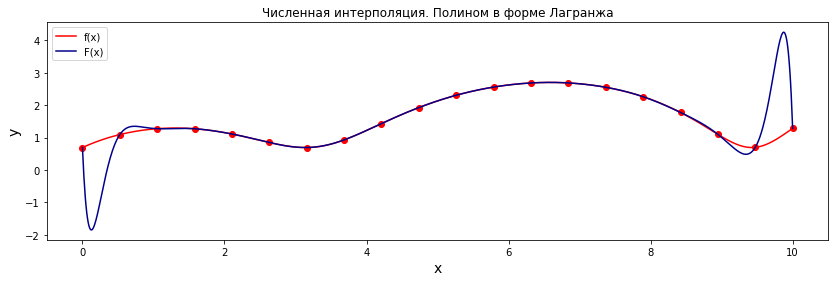

In [12]:
# общий график
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title("Численная интерполяция. Полином в форме Лагранжа")

ax.scatter(x1_plot, y1_plot, c = 'r')
ax.plot(x_plot, y_plot, color="red", label='f(x)')
ax.plot(X0_plot, Y0_plot, color="darkblue", label='F(x)')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

ax.legend()

plt.show()

In [13]:
# Значение интерполянты в заданных по условию точках
for x, y in zip(X1_plot, Y1_plot):
    print("(x* = {0:.4f}, F(x*) = {1:.4f})".format(x, y))

(x* = 0.0000, F(x*) = 0.6931)
(x* = 0.2632, F(x*) = -0.8296)
(x* = 0.5263, F(x*) = 1.0924)
(x* = 0.7895, F(x*) = 1.3400)
(x* = 1.0526, F(x*) = 1.2737)
(x* = 1.3158, F(x*) = 1.2799)
(x* = 1.5789, F(x*) = 1.2715)
(x* = 1.8421, F(x*) = 1.2089)
(x* = 2.1053, F(x*) = 1.1095)
(x* = 2.3684, F(x*) = 0.9850)
(x* = 2.6316, F(x*) = 0.8480)
(x* = 2.8947, F(x*) = 0.7341)
(x* = 3.1579, F(x*) = 0.6934)
(x* = 3.4211, F(x*) = 0.7589)
(x* = 3.6842, F(x*) = 0.9279)
(x* = 3.9474, F(x*) = 1.1665)
(x* = 4.2105, F(x*) = 1.4315)
(x* = 4.4737, F(x*) = 1.6899)
(x* = 4.7368, F(x*) = 1.9246)
(x* = 5.0000, F(x*) = 2.1300)
(x* = 5.2632, F(x*) = 2.3043)
(x* = 5.5263, F(x*) = 2.4465)
(x* = 5.7895, F(x*) = 2.5563)
(x* = 6.0526, F(x*) = 2.6347)
(x* = 6.3158, F(x*) = 2.6830)
(x* = 6.5789, F(x*) = 2.7000)
(x* = 6.8421, F(x*) = 2.6840)
(x* = 7.1053, F(x*) = 2.6339)
(x* = 7.3684, F(x*) = 2.5500)
(x* = 7.6316, F(x*) = 2.4283)
(x* = 7.8947, F(x*) = 2.2590)
(x* = 8.1579, F(x*) = 2.0367)
(x* = 8.4211, F(x*) = 1.7745)
(x* = 8.6

#### Погрешность интерполирования

> <span style="font-style:normal; font-size:12pt;"> 
Погрешность интерполяционного полинома в исследуемых точках </span>

In [14]:
e = 0                                    # e - погрешность

for i in range(len(X1_plot)):
    y_ = f(X1_plot[i])                   # вычисление значения исходной функции в исследуемых точках
    
    if np.abs(y_ - Y1_plot[i]) > e:
        e = np.abs(y_ - Y1_plot[i])

print(f"Вывод: погрешность интерполяционного полинома в исследуемых точках e = {e}")

Вывод: погрешность интерполяционного полинома в исследуемых точках e = 2.1305422807276546


In [15]:
# def n_derivative(n):
#     x = Symbol('x')
#     y = log(2 + x * (1 + cos(x)))
#     for i in range(n + 2):
#         y = y.diff(x)
#     y = lambdify(x, y, 'numpy')
#     print(y)

In [16]:
# # функция оценки погрешности
# def R(x):
#     res = 1
    
#     w = 1
#     M = 0
    
#     for i in range(n):
#         w *= (x - x1_plot[i])
#     w = np.abs(w)
    
#     res = w / math.factorial(n + 1)  
#     n_derivative(2)
    
#     return res

In [17]:
# e = 0                             # значение погрешности интерполирования в точке
# n = int(np.trunc((b - a) / h))    # количество точек

# # точка интервала
# x = float(input("Input x: "))

In [18]:
# if x >= a and x <= b:
#     e = R(x)
    
# print("Погрешность: ", e)

In [19]:
# from sympy import *
# import numpy as np
# x = Symbol('x')
# y = x**2 + 1

# f = lambdify(x, yprime, 'numpy')
# f(np.ones(5))
# [ 2.  2.  2.  2.  2.]

### Подытог

In [20]:
print("Шаг узлов интерполяции h: ", h)
print("Погрешность e: ", e)

Шаг узлов интерполяции h:  0.5
Погрешность e:  2.1305422807276546


> <span style="font-style:normal; font-size:12pt;"> 
    > <p> 1. Погрешность уменьшается с уменьшением шага узлов интерполяции </p> 
    > <p> 2. Возможная причина вобросов на концах:                         </p>
    > <p> <pre> а) выбор вычислительного алгоритма                   </pre></p> 
    > <p> <pre> б) выбор узлов интерполяции (феномен Рунге)          </pre></p></span>

### б) Узлы Чебышева

In [25]:
# приближенная функция
def F2(x, x2_plot, y2_plot):
    sum = 0
    
    for i in range(len(x2_plot)):
        mult = 1
        
        for j in range(len(x2_plot)):
            if i != j:
                mult *= (x - x2_plot[j]) / (x2_plot[i] - x2_plot[j])
                
        sum += y2_plot[i] * mult
    
    return sum

In [21]:
# количество узлов Чебышева
n = int(input("Input nodes count n: "))

Input nodes count n: 50


In [22]:
# узлы интеполяции
x2_plot = []

for i in range(n):
    x_ = (a + b) / 2 + (b - a) / 2 * np.cos((2 * (i + 1) - 1) / (2 * n) * np.pi )
    x2_plot.append(x_)

y2_plot = [f(x) for x in x2_plot]

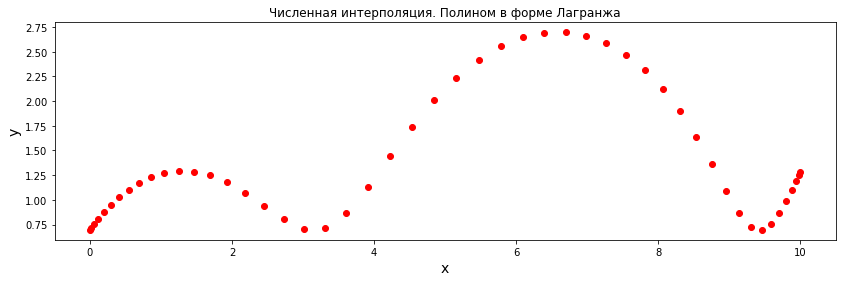

In [23]:
# задание графика
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title("Численная интерполяция. Полином в форме Лагранжа")
ax.scatter(x2_plot, y2_plot, c='r')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

plt.show()

In [26]:
# интерполянта (точки для построения гладкого графика)
X_plot = np.linspace(a, b, 1000)
Y_plot = [F2(x, x2_plot, y2_plot) for x in X_plot]

In [27]:
# задание исследуемых точек
X2_plot = []

for i in range(0, len(x2_plot) - 1):
    X2_plot.append(x2_plot[i])
    x_ = (x2_plot[i] + x2_plot[i + 1]) / 2
    X2_plot.append(x_)

X2_plot.append(x2_plot[len(x2_plot) - 1])

Y2_plot = [F2(x, x2_plot, y2_plot) for x in X2_plot]

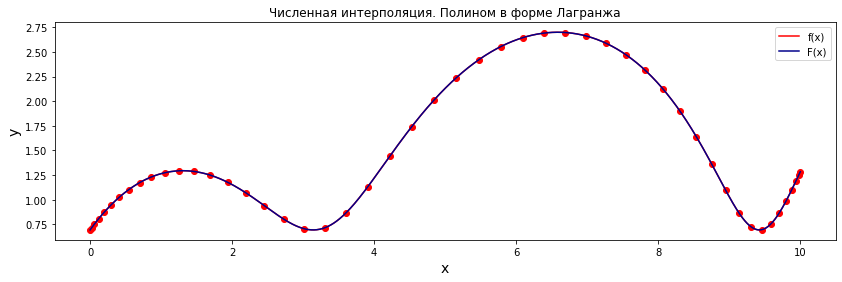

In [28]:
# общий график
fig, ax = plt.subplots(figsize=(14, 4))
ax.set_title("Численная интерполяция. Полином в форме Лагранжа")

ax.scatter(x2_plot, y2_plot, c = 'r')
ax.plot(x_plot, y_plot, color="red", label='f(x)')
ax.plot(X_plot, Y_plot, color="darkblue", label='F(x)')

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

ax.legend()

plt.show()

In [29]:
# Значение интерполянты в заданных по условию точках
for x, y in zip(X2_plot, Y2_plot):
    print("(x* = {0:.4f}, F(x*) = {1:.4f})".format(x, y))

(x* = 9.9975, F(x*) = 1.2797)
(x* = 9.9877, F(x*) = 1.2644)
(x* = 9.9778, F(x*) = 1.2491)
(x* = 9.9581, F(x*) = 1.2188)
(x* = 9.9384, F(x*) = 1.1886)
(x* = 9.9090, F(x*) = 1.1440)
(x* = 9.8796, F(x*) = 1.1000)
(x* = 9.8405, F(x*) = 1.0432)
(x* = 9.8015, F(x*) = 0.9885)
(x* = 9.7529, F(x*) = 0.9244)
(x* = 9.7044, F(x*) = 0.8658)
(x* = 9.6466, F(x*) = 0.8048)
(x* = 9.5888, F(x*) = 0.7555)
(x* = 9.5219, F(x*) = 0.7153)
(x* = 9.4550, F(x*) = 0.6953)
(x* = 9.3794, F(x*) = 0.6980)
(x* = 9.3037, F(x*) = 0.7266)
(x* = 9.2196, F(x*) = 0.7855)
(x* = 9.1354, F(x*) = 0.8670)
(x* = 9.0431, F(x*) = 0.9748)
(x* = 8.9508, F(x*) = 1.0942)
(x* = 8.8507, F(x*) = 1.2293)
(x* = 8.7506, F(x*) = 1.3647)
(x* = 8.6430, F(x*) = 1.5061)
(x* = 8.5355, F(x*) = 1.6406)
(x* = 8.4210, F(x*) = 1.7745)
(x* = 8.3066, F(x*) = 1.8983)
(x* = 8.1855, F(x*) = 2.0177)
(x* = 8.0645, F(x*) = 2.1257)
(x* = 7.9375, F(x*) = 2.2274)
(x* = 7.8104, F(x*) = 2.3175)
(x* = 7.6778, F(x*) = 2.4000)
(x* = 7.5452, F(x*) = 2.4713)
(x* = 7.40

#### Погрешность

In [30]:
e = 0                                    # e - погрешность

for i in range(len(X2_plot)):
    y_ = f(X2_plot[i])                   # вычисление значения исходной функции в исследуемых точках
    
    if np.abs(y_ - Y2_plot[i]) > e:
        e = np.abs(y_ - Y2_plot[i])
        
print(f"Вывод: погрешность интерполяционного полинома в исследуемых точках e = {e}")

Вывод: погрешность интерполяционного полинома в исследуемых точках e = 4.67590416963759e-06


### Подытог

In [31]:
print("Количество узлов Чебышева n: ", n)
print("Погрешность e: ", e)

Количество узлов Чебышева n:  50
Погрешность e:  4.67590416963759e-06


> <span style="font-style:normal; font-size:12pt;"> 
    <p> 1. Погрешность уменьшается с увеличением числа узлов Чебышева. </p>
    <p> 2. Узлы Чебышева - минимизация ошибки интерполяции             </p></span>

### Вывод

> <span style="font-style:normal; font-size:12pt;"> 
    В данной работе проведенно исследование зависимости точности приближения интерполяционного полинома в форме Лагранжа от количества исходных узлов интерполяции и их взаимного распределения узлов интерполяции в заданном интервале. </span>

### Доп. задание*

> <span style="font-style:normal; font-size:12pt;"> 
  <p> 1. Проиллюстрировать асимптотику постоянной Лебега для последовательности чебышовских сеток на заданном интервале. </p>
  <p> 2. Зависимость постоянной Лебега (общий максимум для наших точек) от выбранного количества точек чебышева (для данной функции) </p>
</span>

In [32]:
def Generate_nodes(n):
    x_plot = []

    for i in range(n):
        x_ = (a + b) / 2 + (b - a) / 2 * np.cos((2 * (i + 1) - 1) / (2 * n) * np.pi )
        x_plot.append(x_)
                
    return x_plot

In [33]:
def Fi(x, cheb_nodes):
    sum = 0
    
    for i in range(len(cheb_nodes)):
        mult = 1
        
        for j in range(len(cheb_nodes)):
            if i != j:
                mult *= abs((x - cheb_nodes[j]) / (cheb_nodes[i] - cheb_nodes[j]))
                
        sum += mult
    
    return sum

In [34]:
def Lebeg(n, x_plot):
    
    cheb_nodes = Generate_nodes(n)    
    
    results = []
    
    for x in x_plot:
        results.append(Fi(x, cheb_nodes))
        
    return max(results)

> <span style="font-style:normal; font-size:12pt;"> 
В случае чебышовских сеток для постоянной Лебега справедлива следующая оценка: </span>

$$
\begin{equation}
\Lambda_n \sim \frac{2}{\pi} ln(n + 1) \\
\frac{2}{\pi} ln(n + 1) + \alpha \leq \Lambda_n \leq \frac{2}{\pi} ln(n + 1) + 1, \quad \alpha = 0.9625...
\end{equation}
$$

In [35]:
alpha = 0.9625             # постоянная пропорциональности

In [36]:
def Sup(i):
    return 2/np.pi * np.log(i + 1) + 1

In [37]:
def Inf(i):
    return 2/np.pi * np.log(i + 1) + alpha

In [38]:
# Оценка сверху для последовательности чебышовских сеток
def Func(i):
    return 8 + (4 / np.pi * np.log(i))

> <span style="font-style:normal; font-size:12pt;"> 
(!) В качестве интервала возьмем исходный интервал [a, b] </span>

In [39]:
print(f"[{a}, {b}]")

[0, 10]


In [40]:
# число точек
n = int(input("Input count of points n: "))

Input count of points n: 100


In [41]:
N_plot = np.arange(1, n)
Y_plot_inf = [Inf(i) for i in N_plot]
Y_plot_sup = [Sup(i) for i in N_plot]
Y_plot_func = [Func(i) for i in N_plot]

> <span style="font-style:normal; font-size:12pt;"> 
Постоянная Лебега для исходных точек </span>


In [42]:
# Исходные точки численной интерполяции
   
# Узлы Чебышева
print("Узлы Чебышева")
for x in X2_plot:
    print("x* = {0:.4f}".format(x))

Узлы Чебышева
x* = 9.9975
x* = 9.9877
x* = 9.9778
x* = 9.9581
x* = 9.9384
x* = 9.9090
x* = 9.8796
x* = 9.8405
x* = 9.8015
x* = 9.7529
x* = 9.7044
x* = 9.6466
x* = 9.5888
x* = 9.5219
x* = 9.4550
x* = 9.3794
x* = 9.3037
x* = 9.2196
x* = 9.1354
x* = 9.0431
x* = 8.9508
x* = 8.8507
x* = 8.7506
x* = 8.6430
x* = 8.5355
x* = 8.4210
x* = 8.3066
x* = 8.1855
x* = 8.0645
x* = 7.9375
x* = 7.8104
x* = 7.6778
x* = 7.5452
x* = 7.4076
x* = 7.2700
x* = 7.1278
x* = 6.9857
x* = 6.8397
x* = 6.6937
x* = 6.5443
x* = 6.3950
x* = 6.2428
x* = 6.0907
x* = 5.9364
x* = 5.7822
x* = 5.6264
x* = 5.4705
x* = 5.3138
x* = 5.1571
x* = 5.0000
x* = 4.8429
x* = 4.6862
x* = 4.5295
x* = 4.3736
x* = 4.2178
x* = 4.0636
x* = 3.9093
x* = 3.7572
x* = 3.6050
x* = 3.4557
x* = 3.3063
x* = 3.1603
x* = 3.0143
x* = 2.8722
x* = 2.7300
x* = 2.5924
x* = 2.4548
x* = 2.3222
x* = 2.1896
x* = 2.0625
x* = 1.9355
x* = 1.8145
x* = 1.6934
x* = 1.5790
x* = 1.4645
x* = 1.3570
x* = 1.2494
x* = 1.1493
x* = 1.0492
x* = 0.9569
x* = 0.8646
x* = 0.7804
x*

In [43]:
L_plot= [Lebeg(i, X2_plot) for i in N_plot]

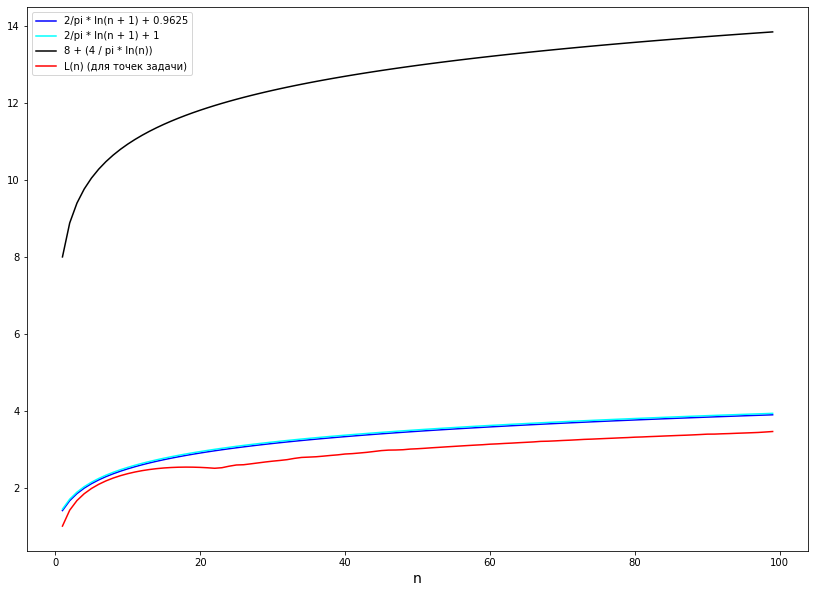

Количество исходных точек Чебышева: 99
Рассматриваемый промежуток для значения n: [1, 100 ]


In [45]:
# график
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(N_plot, Y_plot_inf, color="blue", label='2/pi * ln(n + 1) + 0.9625')
ax.plot(N_plot, Y_plot_sup, color="cyan", label='2/pi * ln(n + 1) + 1')
ax.plot(N_plot, Y_plot_func, color="black", label='8 + (4 / pi * ln(n))')
ax.plot(N_plot, L_plot, color="red", label='L(n) (для точек задачи)')

ax.set_xlabel("n", fontsize=14)        

ax.legend()

plt.show()

print('Количество исходных точек Чебышева:', len(X2_plot))
print('Рассматриваемый промежуток для значения n: [1,', n, ']')

In [26]:
# def InfTotal(i):
#     return 1/(8 * np.sqrt(np.pi)) * np.log(i)

In [23]:
# # Оценка сверху для последовательности чебышовских сеток
# def Func(i):
#     return 8 + (4 / np.pi * np.log(i))

In [108]:
# # оценка сверху
# x_plot = np.arange(1, n)
# y_plot = [Func(x) for x in x_plot]

In [109]:
# # график
# fig, ax = plt.subplots(figsize=(14, 4))

# ax.plot(x_plot, y_plot, color="red", label='8 + 4/pi * ln(n)')
# ax.set_xlabel("n", fontsize=14)        

# ax.legend()

# plt.show()

In [162]:
# # график
# fig, ax = plt.subplots(figsize=(14, 10))

# ax.plot(N_plot, L1_plot, color="magenta", label='L(n) (равномерный шаг)')
# ax.plot(N_plot, L2_plot, color="black", label='L(n) (узлы Чебышева)')

# # ax.plot(x_plot, y_plot, color="red", label='8 + 4/pi * ln(n)')
# ax.plot(N_plot, Y_plot_inf, color="blue", label='2/pi * ln(n + 1) + 0.9625')
# ax.plot(N_plot, Y_plot_sup, color="cyan", label='2/pi * ln(n + 1) + 1')
# # ax.plot(N_plot, Y_plot_infH, color="blue", label='')
# # ax.plot(N_plot, Y_plot_supH, color="cyan", label='')
# # ax.plot(N_plot, Y_plot_infTotal, color="green", label='1/(8 * sqrt(pi)) * ln(n)')


# ax.set_xlabel("n", fontsize=14)        
# ax.set_ylabel("L(n)", fontsize=14)        

# ax.legend()

# plt.show()

In [112]:
# # узлы Чебывеша
# def generate_nodes(n):
#     a = 1
#     b = n

#     x_plot = []
    
#     for i in range(n):
#         x_ = (a + b) / 2 + (b - a) / 2 * np.cos((2 * (i + 1) - 1) / (2 * n) * np.pi )
#         x_plot.append(x_)
    
#     return x_plot

> <span style="font-style:normal; font-size:12pt;"> 
    <p> Оценка сверху зависит от n - натуральное число. </p>
    <p> Постоянная Лебега определяется n - натуральным числом - количество узлов Чебышева на заданном интервале </p>
    <p> n: i = 1, 2, 3, ... </p></span>

In [146]:
# N_plot = np.arange(1, n)
# Y_plot = [L(i) for i in N_plot]

In [ ]:
# # постоянная Лебега
# def L(n):
#     # сумма модулей значений функции Fi(x) в узлах Чебышева
#     sum = 0

#     for i in range(n):
#         sum += np.abs(Fi(i))    
    
#     return sum